<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 189.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 197.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 140.2 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


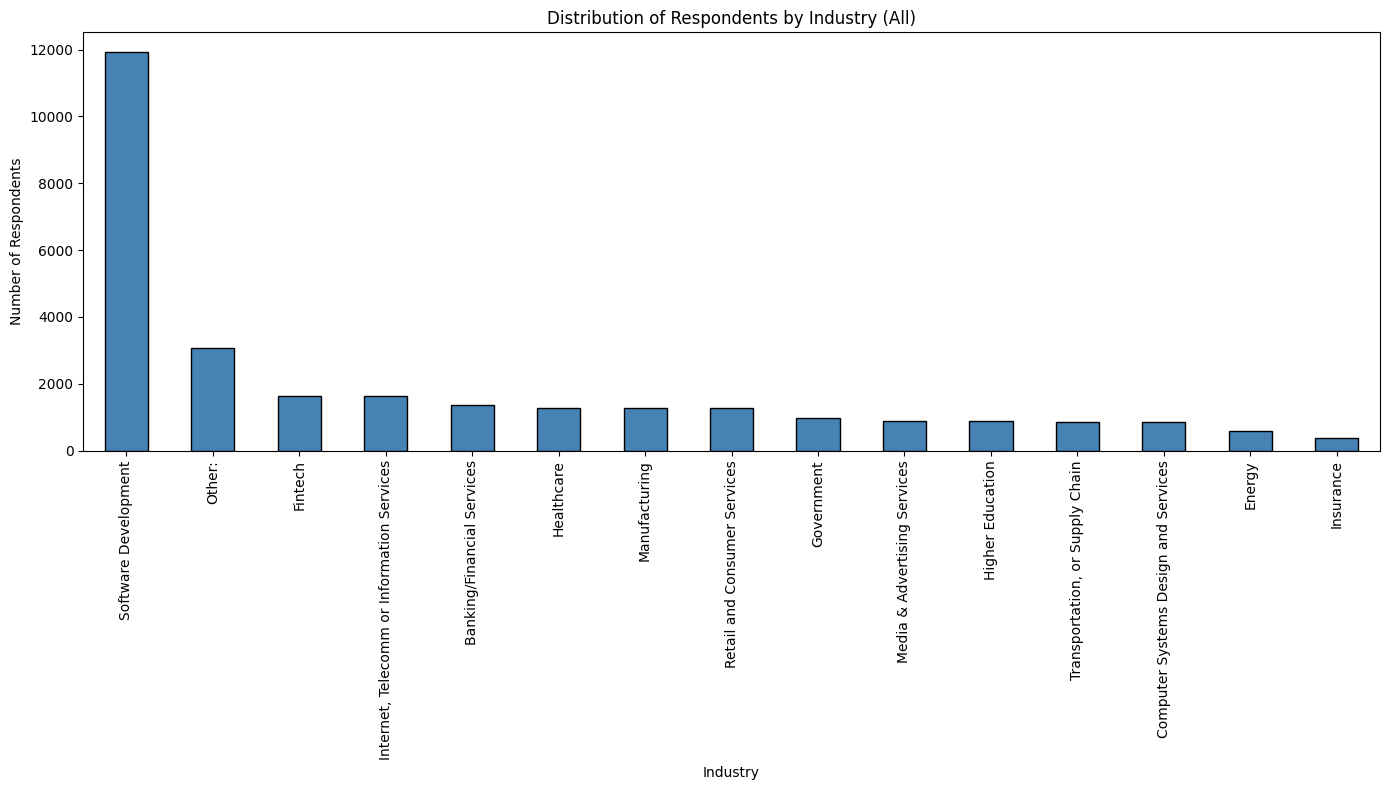

In [5]:
##Write your code here
# Count frequencies of industries
industry_counts = df["Industry"].value_counts()

# Plot bar chart
plt.figure(figsize=(14, 8))
industry_counts.plot(kind="bar", color="steelblue", edgecolor="black")
plt.title("Distribution of Respondents by Industry (All)")
plt.xlabel("Industry")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
##Write your code here
# Drop missing values
comp = df["ConvertedCompYearly"].dropna()

# Basic statistics using describe()
summary = comp.describe()

# Outlier threshold (mean + 3*std)
threshold = summary["mean"] + 3 * summary["std"]

# Outliers
outliers = comp[comp > threshold]

# Print results
print("Compensation Summary:")
print(summary)
print("\nOutlier threshold (mean + 3*std):", threshold)
print("Number of outliers:", len(outliers))
print("Max compensation in dataset:", comp.max())

Compensation Summary:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Outlier threshold (mean + 3*std): 646426.206521534
Number of outliers: 89
Max compensation in dataset: 16256603.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): 32712.0
Q3 (75th percentile): 107971.5
IQR: 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Number of outliers: 978


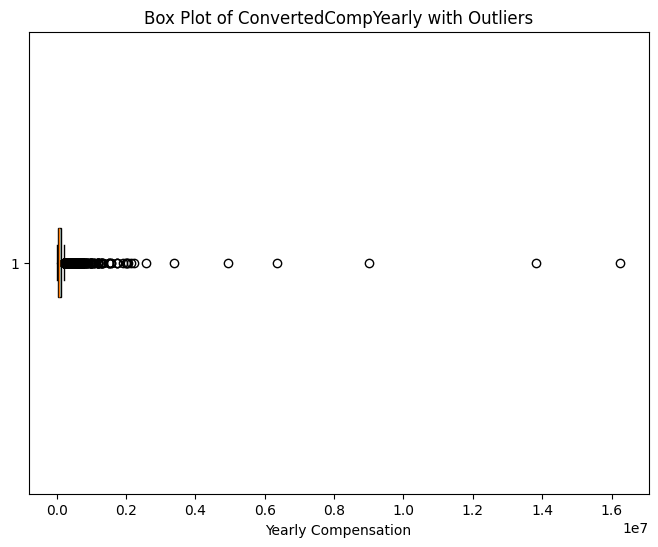

In [7]:
##Write your code here
# Quartiles
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# Outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = comp[(comp < lower_bound) | (comp > upper_bound)]

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Number of outliers:", len(outliers))

# --- Visualization (Box Plot) ---
plt.figure(figsize=(8, 6))
plt.boxplot(comp, vert=False, patch_artist=True,
            boxprops=dict(facecolor="skyblue"))
plt.title("Box Plot of ConvertedCompYearly with Outliers")
plt.xlabel("Yearly Compensation")
plt.show()

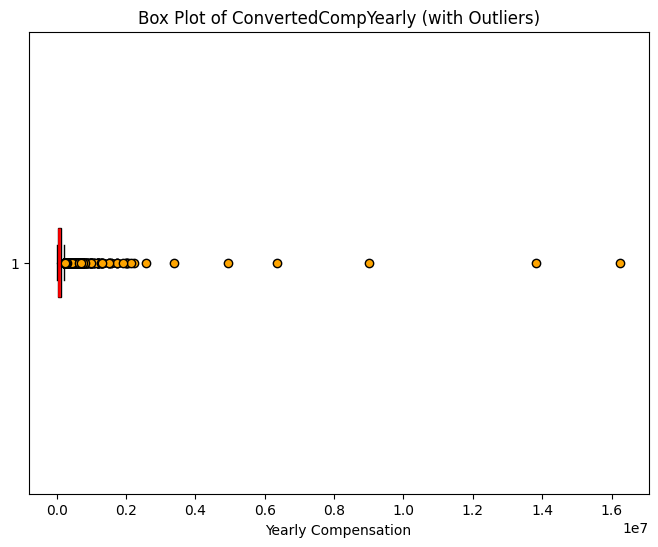

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    df["ConvertedCompYearly"].dropna(),
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="skyblue", color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="red", linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle="none")
)
plt.title("Box Plot of ConvertedCompYearly (with Outliers)")
plt.xlabel("Yearly Compensation")
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [10]:
##Write your code here
# Quartiles and IQR
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# New bounds using 3*IQR
lower_bound = max(0, Q1 - 3 * IQR)  # clamp at 0
upper_bound = Q3 + 3 * IQR

# Filter dataset
df_no_outliers_3iqr = df[(df["ConvertedCompYearly"] >= lower_bound) & 
                         (df["ConvertedCompYearly"] <= upper_bound)]

# Validate sizes
print("Original dataset size:", len(df))
print("New dataset size (without outliers, 3*IQR):", len(df_no_outliers_3iqr))
print("Rows removed:", len(df) - len(df_no_outliers_3iqr))

Original dataset size: 65437
New dataset size (without outliers, 3*IQR): 23119
Rows removed: 42318


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [11]:
##Write your code here

#transforming years code pro to numeric
def clean_years_code(x):
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df["YearsCodePro_clean"] = df["YearsCodePro"].apply(clean_years_code)

age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70,
    "Prefer not to say": None  # Treat as missing
}

# Apply mapping
df["Age_numeric"] = df["Age"].map(age_map)



                     Age_numeric    JobSat  YearsCodePro_clean  \
Age_numeric             1.000000  0.070373            0.818956   
JobSat                  0.070373  1.000000            0.102815   
YearsCodePro_clean      0.818956  0.102815            1.000000   
ConvertedCompYearly     0.135408  0.048037            0.158712   

                     ConvertedCompYearly  
Age_numeric                     0.135408  
JobSat                          0.048037  
YearsCodePro_clean              0.158712  
ConvertedCompYearly             1.000000  


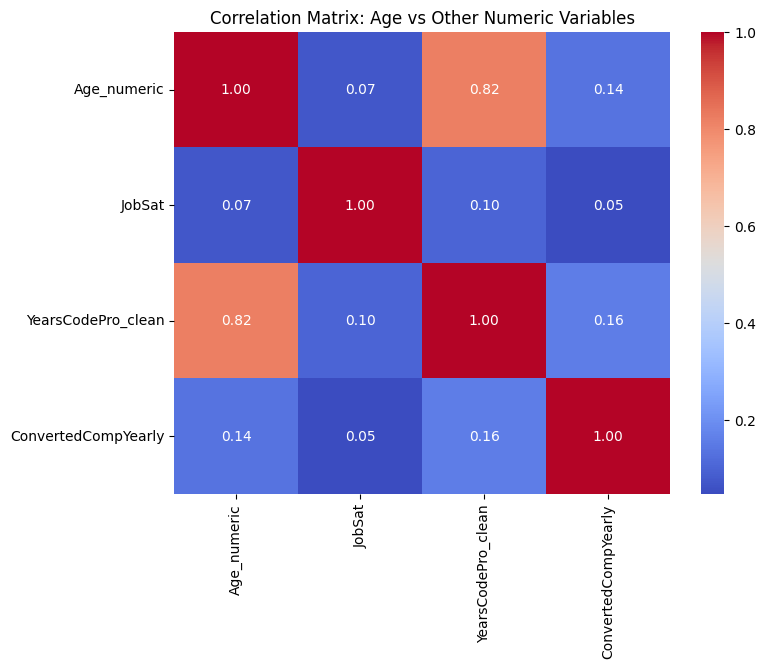

In [12]:
# Select numeric columns
numeric_cols = ["Age_numeric", "JobSat", "YearsCodePro_clean", "ConvertedCompYearly"]

# Drop rows with missing values
num_df = df[numeric_cols].dropna()

# Pearson correlation
corr_matrix = num_df.corr(method="pearson")

print(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix: Age vs Other Numeric Variables")
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
